# Multipoint ICMEs plots

May 2024 events

environment helio4 see heliocats/envs

---

**MIT LICENSE**

Copyright 2024, Christian Moestl

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software
without restriction, including without limitation the rights to use, copy, modify, 
merge, publish, distribute, sublicense, and/or sell copies of the Software, and to 
permit persons to whom the Software is furnished to do so, subject to the following 
conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT 
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF 
CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE 
OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.





In [2]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
import seaborn as sns
import numpy as np
import scipy.io
from scipy import stats
import sys
from datetime import datetime
from datetime import timedelta
import time
import pickle
import os
import copy
import urllib
import json
import warnings
import importlib


import sunpy
import sunpy.time
from sunpy.time import parse_time


import astropy
import astropy.constants as const

#our own packages

data_path='/Users/chris/python/data/may_2024_events/'

plt.rcParams["figure.figsize"] = (15,8)
plt.close('all')

#constants: 
#solar radius
Rs_in_AU=float(const.R_sun/const.au)
#define AU in km
AU_in_km=const.au.value/1e3


print('sunpy:',sunpy.__version__)
print('astropy:',astropy.__version__)

print('done')

sunpy: 4.1.2
astropy: 5.3.1
done


In [86]:
print('load data') 


filenoaa="noaa_rtsw_last_35files_now.p" 
[noaa,hnoaa]=pickle.load(open(data_path+filenoaa, "rb" ) )  


filenoaa="noaa_dst_last_35files_now.p" 
dst=pickle.load(open(data_path+filenoaa, "rb" ) )  



filesta='stereoa_beacon_gsm_last_35days_now.p'
[sta,hsta]=pickle.load(open(data_path+filesta, "rb" ) )  


print('done')
    

load data
done


## EVENT 2024 May 8-12

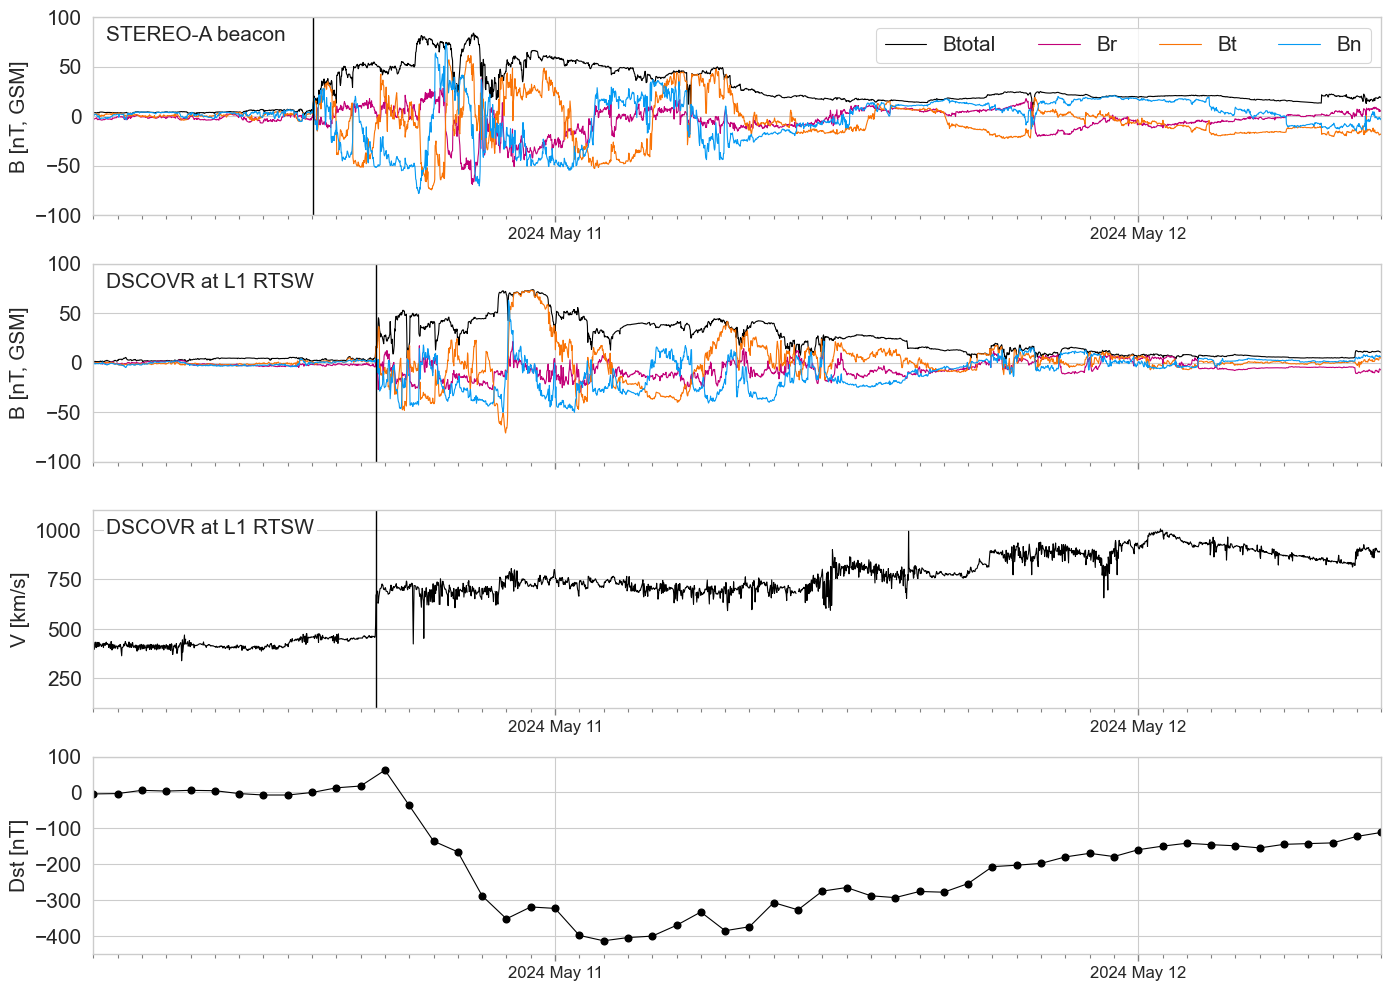

In [87]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(1,figsize=(14, 10),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (1, 0))  
ax2 = plt.subplot2grid((4, 1), (0, 0))  
ax3 = plt.subplot2grid((4, 1), (2, 0))  
ax4 = plt.subplot2grid((4, 1), (3, 0))  


#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)

plotstart=datetime(2024,5,10,5)
plotend=datetime(2024,5,12,10)


blim=30
linewi=0.8
days_dist=1


#DSCOVR
ax1.plot(noaa.time, noaa.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(noaa.time, noaa.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax1.plot(noaa.time, noaa.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax1.plot(noaa.time, noaa.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')



#ax1.plot(win.time, win.bt, "k-", lw=linewi,label='Btotal')
#ax1.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
#ax1.plot(win.time, win.by, "g-", color="xkcd:orange", lw=linewi,label='By')
#ax1.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')

ax1.set_ylabel('B [nT, GSM]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
#ax1.set_ylim(-blim,blim)
#ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(which='both', bottom=True, color='gray')
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax1.set_xticklabels([])


#ax11.plot(noaa.time, noaa.vt, color="black",linewidth=1,label='Vp Wind')
#ax11.set_ylabel('V [km $\mathrm{s^{-1}}$]',fontsize=15)
#ax11.set_xlim(plotstart,plotend)
#ax11.set_ylim(300,610)
#ax11.tick_params(axis='y', labelsize=15)
#ax11.grid(True)
#ax11.tick_params(axis='x', labelsize=12)
#ax11.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
#ax11.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))

#ax11.set_xticklabels([])



### STEREO-A
#blim=25

ax2.plot(sta.time, sta.bt, "k-", lw=linewi,label='Btotal')
ax2.plot(sta.time, sta.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax2.plot(sta.time, sta.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax2.plot(sta.time, sta.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')

ax2.legend(loc=1,ncol=4,fontsize=15)
ax2.set_ylabel('B [nT, GSM]',fontsize=15)
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax2.tick_params(which='both', bottom=True, color='gray')
ax2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))



ax3.plot(noaa.time, noaa.vt, "k-", lw=linewi,label='V')
ax3.set_ylabel('V [km/s]',fontsize=15)
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(100,1100)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax3.grid(True)
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax3.tick_params(which='both', bottom=True, color='gray')
ax3.xaxis.set_minor_locator(mdates.HourLocator(interval=1))



ax4.plot(dst.time, dst.dst, "o-k", lw=linewi,label='Dst')
ax4.set_ylabel('Dst [nT]',fontsize=15)
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(-450,100)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax4.grid(True)
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax4.tick_params(which='both', bottom=True, color='gray')
ax4.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))




dsc_is=parse_time('2024-05-10T16:37Z').datetime

#dsc_ms=parse_time('2024-03-24T18:21Z').datetime
#dsc_me=parse_time('2024-03-25T10:01Z').datetime



ax1.plot_date([dsc_is,dsc_is],[-500,500],'-k',linewidth=1)            
ax1.plot_date([dsc_ms,dsc_ms],[-500,500],'-k',linewidth=1)            
ax1.plot_date([dsc_me,dsc_me],[-500,500],'-k',linewidth=1)  
ax1.set_ylim(-100,100)

ax3.axvline(dsc_is,linewidth=1,color='black')  


sta_is=parse_time('2024-05-10T14:03Z').datetime


#sta_ms=parse_time('2024-03-24T19:32Z').datetime
#sta_me=parse_time('2024-03-26T06:31Z').datetime

ax2.plot_date([sta_is,sta_is],[-500,500],'-k',linewidth=1)            
ax2.plot_date([sta_ms,sta_ms],[-500,500],'-k',linewidth=1)            
ax2.plot_date([sta_me,sta_me],[-500,500],'-k',linewidth=1)  
ax2.set_ylim(-100,100)

ax1.annotate('DSCOVR at L1 RTSW',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('STEREO-A beacon',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax3.annotate('DSCOVR at L1 RTSW',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))




plt.tight_layout()


plt.savefig('../results/may_2024_lineup/figure_2024_may.jpg')
plt.savefig('../results/may_2024_lineup/figure_2024_may.png')
plt.savefig('../results/may_2024_lineup/figure_2024_may.pdf')

In [85]:
#positions at shock arrival time


print()
print('STEREO-A position')
sta_is_index=np.where(sta.time == sta_is)[0][0]
print(sta.r[sta_is_index], ' AU')
print(sta.lon[sta_is_index], ' deg longitude HEEQ')
print(sta.lat[sta_is_index], ' deg latitude HEEQ')


print()
print('DSCOVR position')

noaa_is_index=np.where(noaa.time == dsc_is)[0][0]
print(noaa.r[noaa_is_index], ' AU')
print(noaa.lon[noaa_is_index], ' deg longitude HEEQ')
print(noaa.lat[noaa_is_index], ' deg latitude HEEQ')


STEREO-A position
0.956486781578134  AU
12.553502306504882  deg longitude HEEQ
-1.5701177695533637  deg latitude HEEQ

DSCOVR position
1.0003709921052348  AU
-0.013441068280954984  deg longitude HEEQ
-3.072640863343401  deg latitude HEEQ


- L1 DSCOVR real time data:

shock 2024-05-10T16:37Z

ICME start, MO start and MO end

CME 1 2024-05-10T16:37Z & 2024-05-10T19:10Z & 2024-05-10T22:04Z


CME 2
2024-05-10T21:39Z & 2024-05-10T22:05Z & 2024-05-11T01:20Z


CME 3 (side hit?)
2024-05-11T00:02Z & 2024-05-11T02:18Z & 2024-05-11T07:27Z


CME 4 
2024-05-11T07:34Z & 2024-05-11T07:55Z & 2024-05-11T09:30Z


CME 5
2024-05-11T10:41Z & 2024-05-11T11:06Z & 2024-05-11T14:31Z




- STEREO-A beacon data

shock 2024-05-10T14:03Z

ICME start, MO start and MO end


CME1 

CME 2

CME 3

CME 4

In [111]:
dsc_is1=parse_time('2024-05-10T16:37Z').datetime
dsc_mo1=parse_time('2024-05-10T19:10Z').datetime
dsc_me1=parse_time('2024-05-10T22:04Z').datetime


dsc_is2=parse_time('2024-05-10T21:39Z').datetime
dsc_mo2=parse_time('2024-05-10T22:05Z').datetime
dsc_me2=parse_time('2024-05-11T01:20Z').datetime

dsc_is3=parse_time('2024-05-11T00:02Z').datetime
dsc_mo3=parse_time('2024-05-11T02:18Z').datetime
dsc_me3=parse_time('2024-05-11T07:27Z').datetime


dsc_is4=parse_time('2024-05-11T07:34Z').datetime
dsc_mo4=parse_time('2024-05-11T07:55Z').datetime
dsc_me4=parse_time('2024-05-11T09:30Z').datetime


dsc_is5=parse_time('2024-05-11T10:41Z').datetime
dsc_mo5=parse_time('2024-05-11T11:06Z').datetime
dsc_me5=parse_time('2024-05-11T14:31Z').datetime






### eigene Figure B, V, temperature, density nur L1 für ID

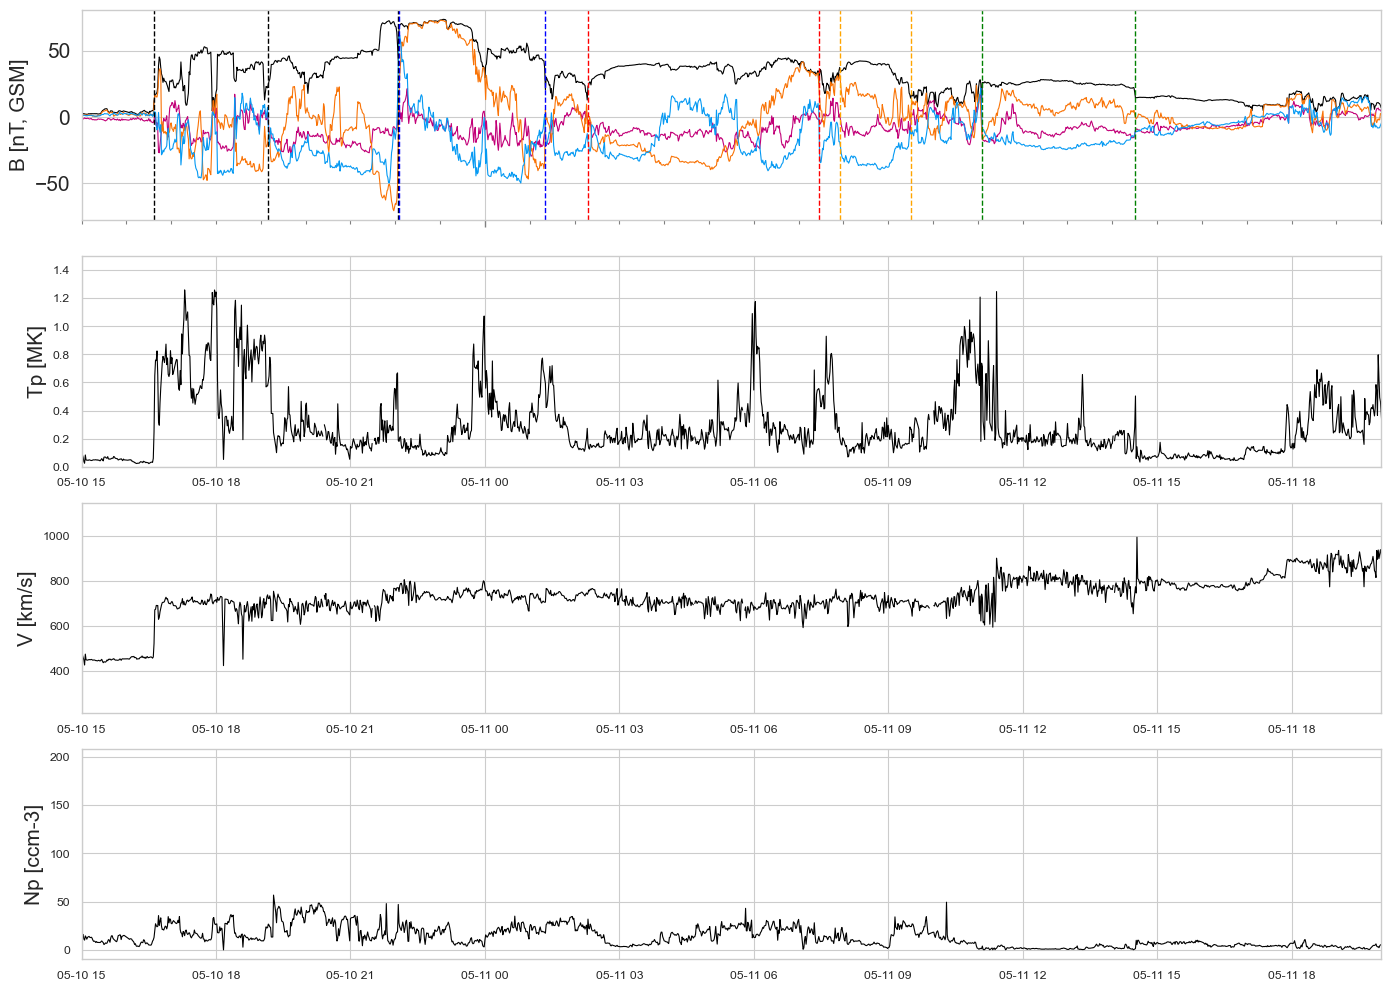

In [120]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(2,figsize=(14, 10),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (0, 0))  
ax2 = plt.subplot2grid((4, 1), (1, 0))  
ax3 = plt.subplot2grid((4, 1), (2, 0))  
ax4 = plt.subplot2grid((4, 1), (3, 0))  


#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)


blim=30
linewi=0.8
days_dist=1


plotstart=datetime(2024,5,10,15)
plotend=datetime(2024,5,11,20)

#DSCOVR
ax1.plot(noaa.time, noaa.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(noaa.time, noaa.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax1.plot(noaa.time, noaa.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax1.plot(noaa.time, noaa.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')

ax1.set_ylabel('B [nT, GSM]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
#ax1.set_ylim(-blim,blim)
#ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(which='both', bottom=True, color='gray')
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax1.set_xticklabels([])

ax2.plot(noaa.time, noaa.tp/1e6, "k-", lw=linewi,label='Btotal')
ax2.set_xlim(plotstart,plotend)
ax2.set_ylabel('Tp [MK]',fontsize=15)
ax2.set_ylim(0,1.5)


ax3.plot(noaa.time, noaa.vt, "k-", lw=linewi,label='Btotal')
ax3.set_xlim(plotstart,plotend)
ax3.set_ylabel('V [km/s]',fontsize=15)


ax4.plot(noaa.time, noaa.np, "k-", lw=linewi,label='Btotal')
ax4.set_xlim(plotstart,plotend)
ax4.set_ylabel('Np [ccm-3]',fontsize=15)


ax1.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_mo1,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_me1,linewidth=1,color='black', linestyle='--')  

#ax1.axvline(dsc_is2,linewidth=1,color='blue', linestyle='--')  
ax1.axvline(dsc_mo2,linewidth=1,color='blue', linestyle='--')  
ax1.axvline(dsc_me2,linewidth=1,color='blue', linestyle='--')  

#ax1.axvline(dsc_is3,linewidth=1,color='red', linestyle='--')  
ax1.axvline(dsc_mo3,linewidth=1,color='red', linestyle='--')  
ax1.axvline(dsc_me3,linewidth=1,color='red', linestyle='--')  


#ax1.axvline(dsc_is4,linewidth=1,color='brown', linestyle='--')  
ax1.axvline(dsc_mo4,linewidth=1,color='orange', linestyle='--')  
ax1.axvline(dsc_me4,linewidth=1,color='orange', linestyle='--')  


#ax1.axvline(dsc_is5,linewidth=1,color='green', linestyle='--')  
ax1.axvline(dsc_mo5,linewidth=1,color='green', linestyle='--')  
ax1.axvline(dsc_me5,linewidth=1,color='green', linestyle='--')  

plt.tight_layout()

plt.savefig('../results/may_2024_lineup/figure2_2024_may.jpg')
plt.savefig('../results/may_2024_lineup/figure2_2024_may.png')
plt.savefig('../results/may_2024_lineup/figure2_2024_may.pdf')


In [84]:
####### compare data to entire Wind mission




data_path2='/Users/chris/python/data/insitu_python/'

filewin="wind_1995_now_rtn.p" 
[win,hwin]=pickle.load(open(data_path2+filewin, "rb" ) )  




**arrival times **:


need to change!

- L1 DSCOVR real time data:

2024-03-24T14:07Z

2024-03-24T18:21Z

2024-03-25T10:01Z


- L1 Wind in ICMECAT:

2024-03-24T14:14Z

2024-03-24T18:22Z

2024-03-25T10:04Z



- STEREO-A beacon data in ICMECAT: 

2024-03-24T14:23Z

2024-03-24T19:32Z

2024-03-26T06:31Z



## EVENT 2024 March 17

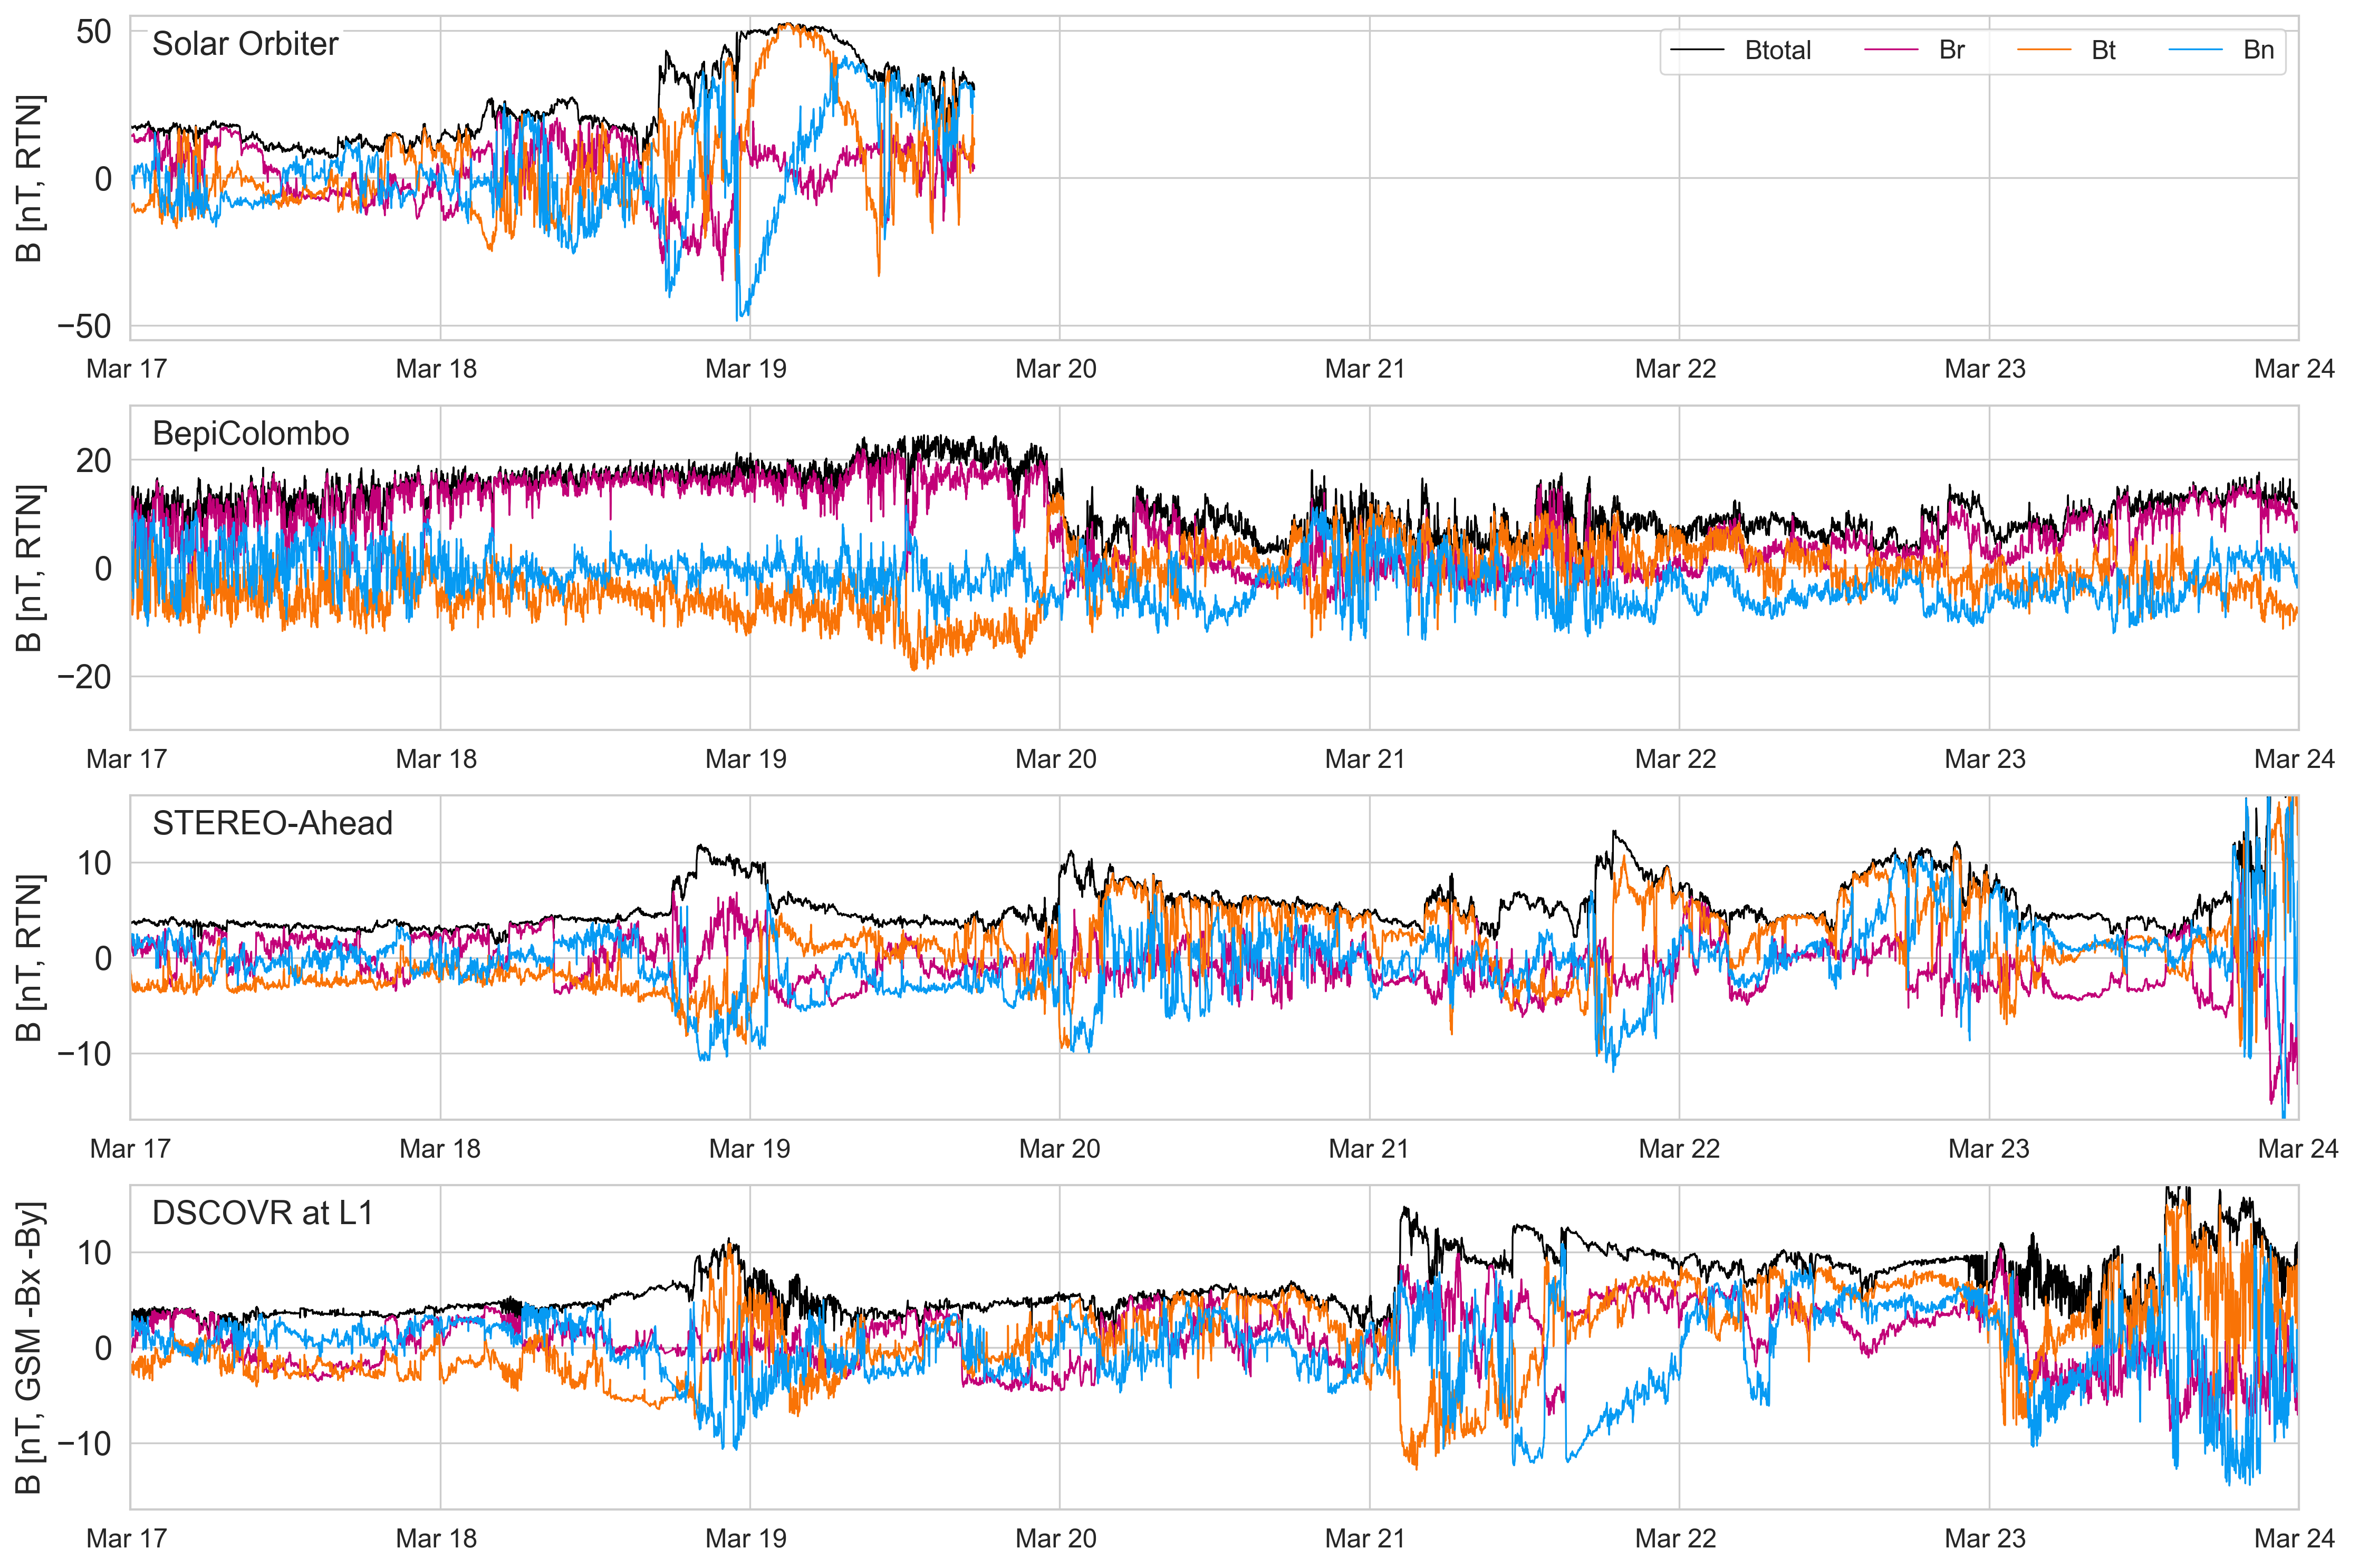

In [30]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(1,figsize=(15, 10),dpi=300)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (3, 0))  
#ax11 = plt.subplot2grid((7, 1), (1, 0))  
#ax12 = plt.subplot2grid((7, 1), (2, 0))  
#ax13 = plt.subplot2grid((7, 1), (3, 0))  
ax2 = plt.subplot2grid((4, 1), (2, 0))  
ax3 = plt.subplot2grid((4, 1), (0, 0))  #solo
ax4 = plt.subplot2grid((4, 1), (1, 0))  



#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)

plotstart=datetime(2024,3,17)
plotend=datetime(2024,3,24)


#for STEREO-A and DSCOVR
blim=17
linewi=0.8
days_dist=1


#Wind
ax1.plot(noaa.time, noaa.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(noaa.time, -noaa.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax1.plot(noaa.time, -noaa.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax1.plot(noaa.time, noaa.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')

#ax1.plot(win.time, win.bt, "k-", lw=linewi,label='Btotal')
#ax1.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
#ax1.plot(win.time, win.by, "g-", color="xkcd:orange", lw=linewi,label='By')
#ax1.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')

ax1.set_ylabel('B [nT, GSM -Bx -By]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
#ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)
#ax1.set_xticklabels([])


#ax11.set_xticklabels([])


### STEREO-A


ax2.plot(sta.time, sta.bt, "k-", lw=linewi,label='Btotal')
ax2.plot(sta.time, sta.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax2.plot(sta.time, sta.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax2.plot(sta.time, sta.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')
    
ax2.set_ylabel('B [nT, RTN]',fontsize=15)
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d') )
ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


### Solar Orbiter
blim=55
ax3.plot(solo2.time, solo2.bt, "k-", lw=linewi,label='Btotal')
ax3.plot(solo2.time, solo2.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax3.plot(solo2.time, solo2.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax3.plot(solo2.time, solo2.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')
    
ax3.set_ylabel('B [nT, RTN]',fontsize=15)
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(-blim,blim)
ax3.legend(loc=1,ncol=4,fontsize=12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=15)
ax3.grid(True)
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


### Bepi
blim=30

ax4.plot(bepi.time, bepi.bt, "k-", lw=linewi,label='Btotal')
ax4.plot(bepi.time, bepi.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax4.plot(bepi.time, bepi.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax4.plot(bepi.time, bepi.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')
    
ax4.set_ylabel('B [nT, RTN]',fontsize=15)
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(-blim,blim)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=15)
ax4.grid(True)
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


ax1.annotate('DSCOVR at L1',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('STEREO-Ahead',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax3.annotate('Solar Orbiter',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax4.annotate('BepiColombo',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))

#ax2.annotate('Data sources: Solar Orbiter MAG (Imperial College), DSCOVR (NOAA), STEREO-A (UCLA, NASA)',(0.01,0.02),xycoords='axes fraction',fontsize=10)
#ax4.annotate('Data source: BepiColombo MPO-MAG (IGEP Braunschweig/IWF Graz/ISAS/IC)',(0.01,0.02),xycoords='axes fraction',fontsize=10)


plt.tight_layout()


plt.savefig('../results/march_2024_lineup/figure_2024_march_17.png')
plt.savefig('../results/march_2024_lineup/figure_2024_march_17.pdf')


## Plot 2021 Nov 2-4 CME

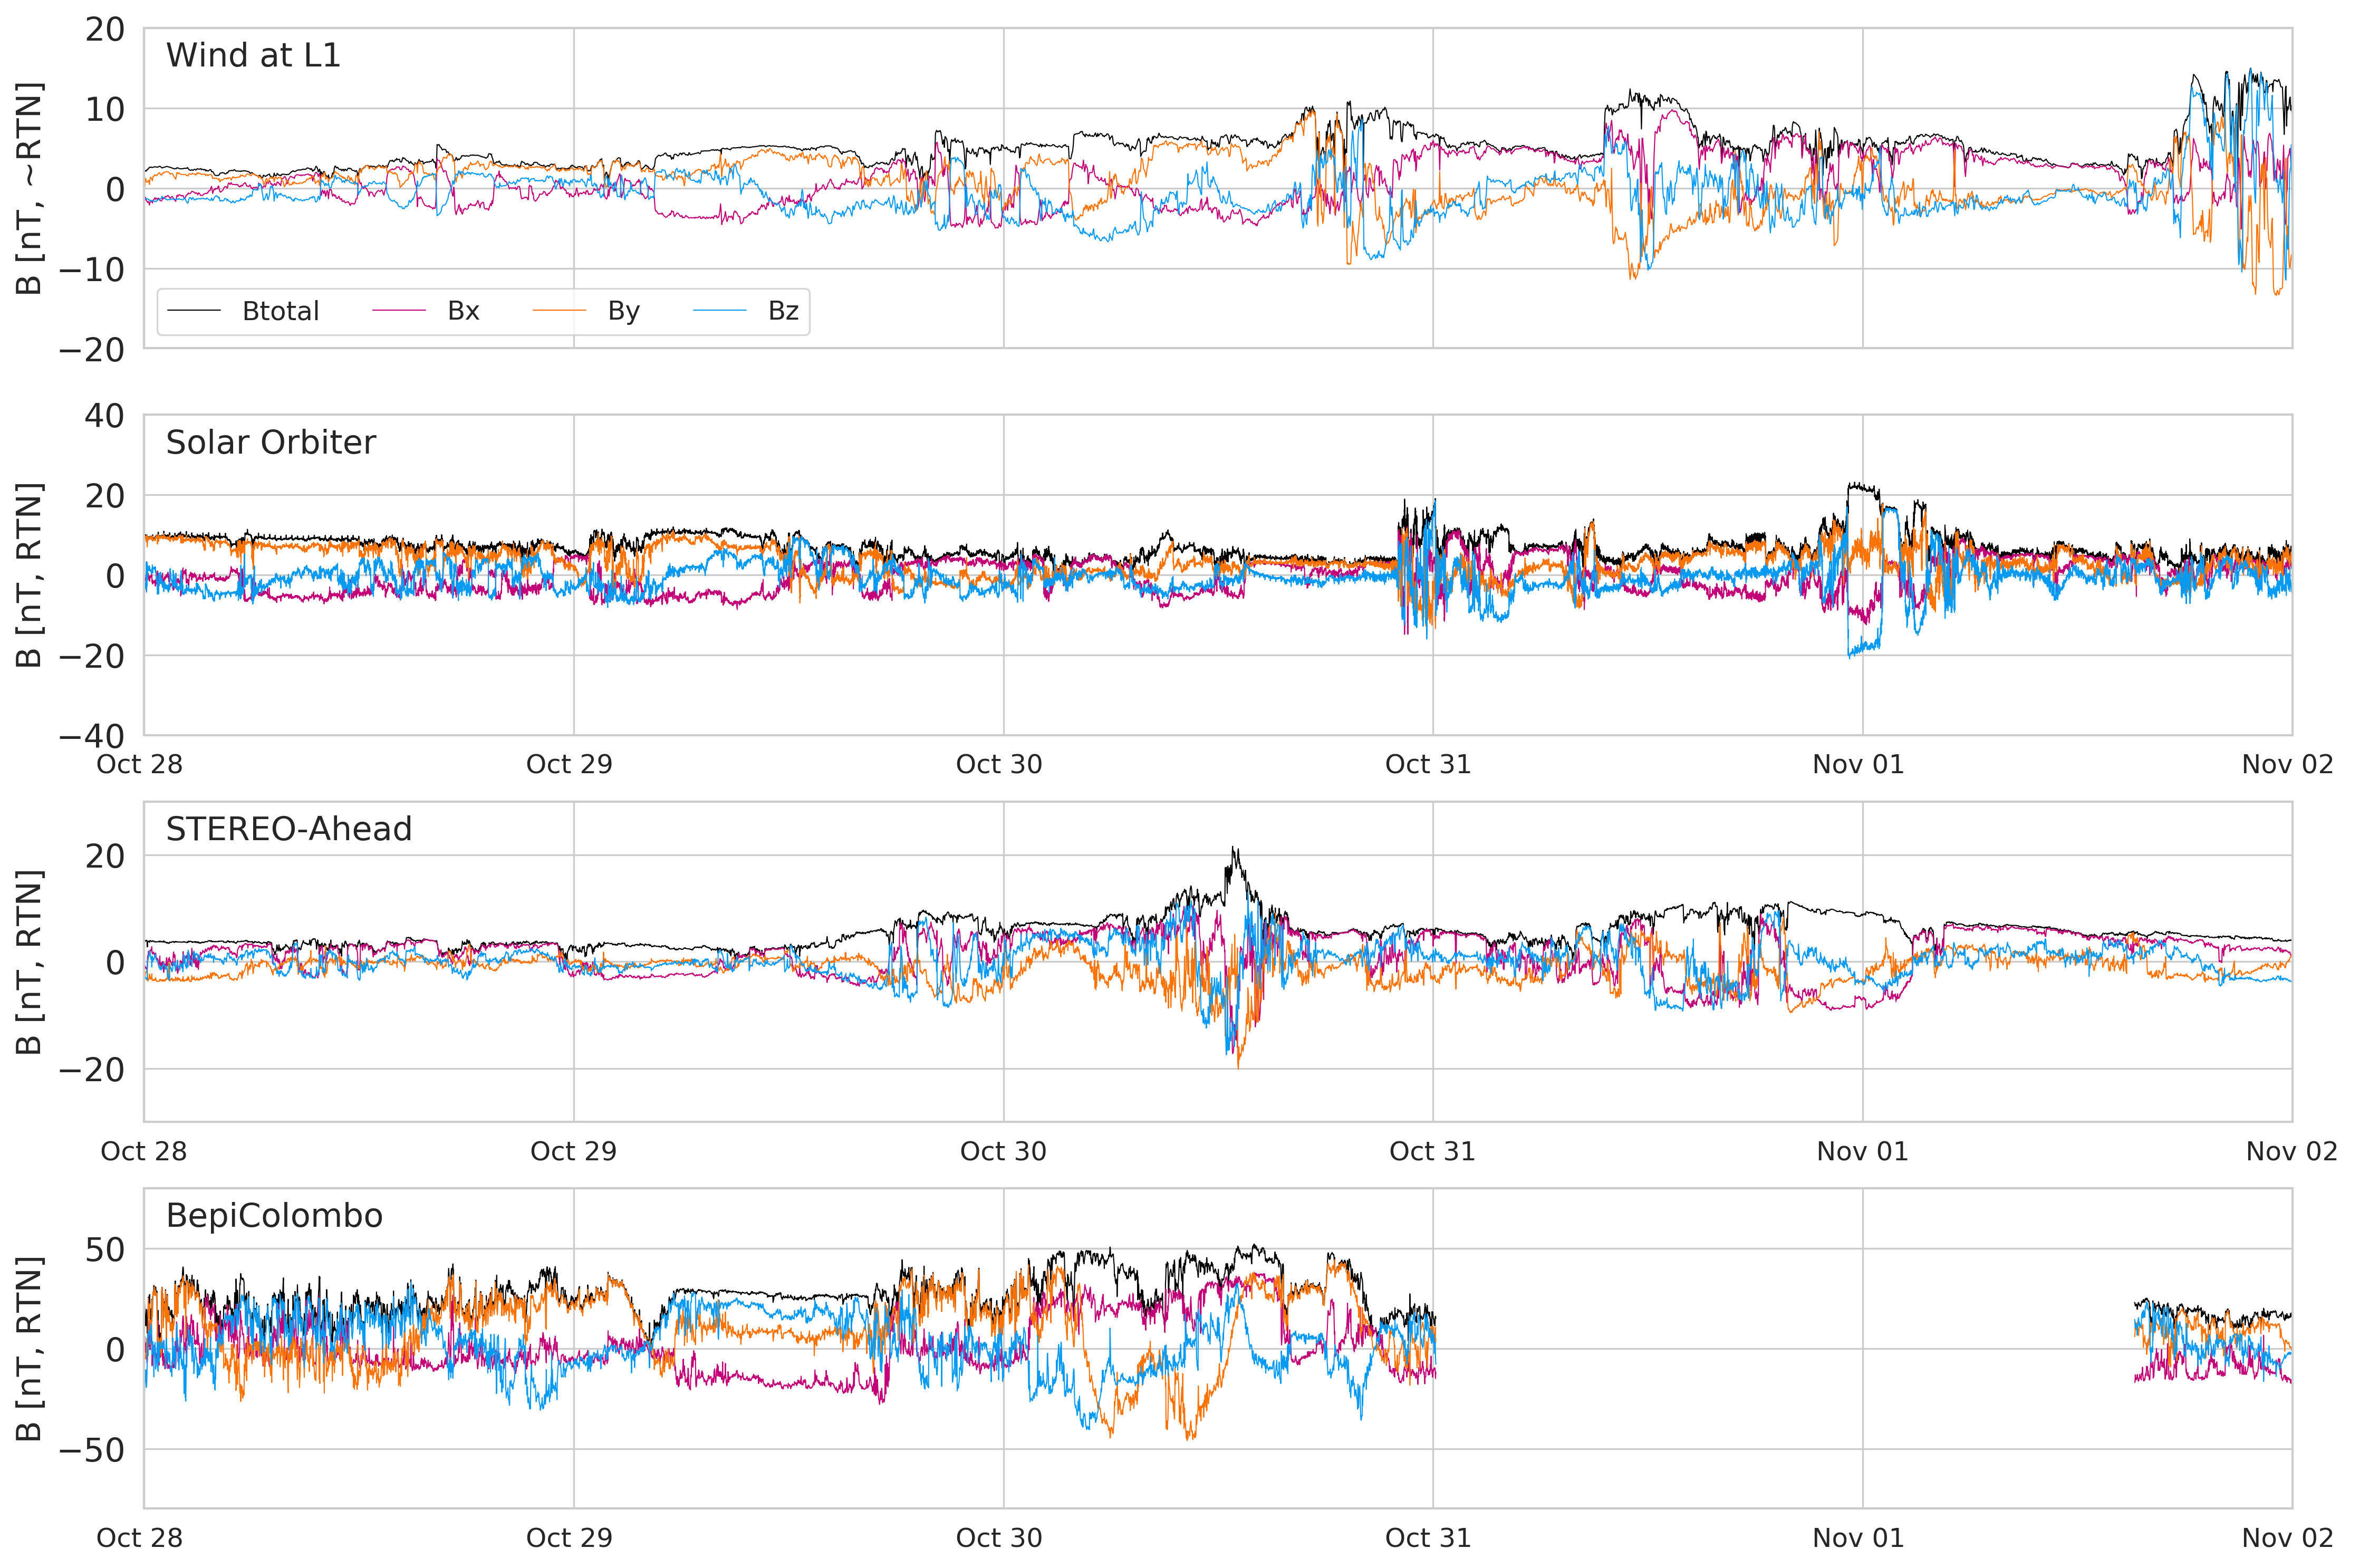

In [10]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(1,figsize=(15, 10),dpi=300)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (0, 0))  
#ax11 = plt.subplot2grid((7, 1), (1, 0))  
#ax12 = plt.subplot2grid((7, 1), (2, 0))  
#ax13 = plt.subplot2grid((7, 1), (3, 0))  
ax2 = plt.subplot2grid((4, 1), (2, 0))  
ax3 = plt.subplot2grid((4, 1), (1, 0))  
ax4 = plt.subplot2grid((4, 1), (3, 0))  



#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)

plotstart=datetime.datetime(2021,10,28)
plotend=datetime.datetime(2021,11,2)



blim=20

linewi=0.5

days_dist=1


#Wind
ax1.plot(win.time, win.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
ax1.plot(win.time, win.by, "g-", color="xkcd:orange", lw=linewi,label='By')
ax1.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')

ax1.set_ylabel('B [nT, ~RTN]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)
ax1.set_xticklabels([])


#ax11.plot(noaa.time, noaa.vt, color="black",linewidth=1,label='Vp Wind')
#ax11.set_ylabel('V [km $\mathrm{s^{-1}}$]')
#ax11.set_xlim(plotstart,plotend)
#ax11.set_ylim(100,550)
#ax11.grid(True)
#ax11.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
#ax11.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))

#ax11.set_xticklabels([])



### STEREO-A
blim=30

ax2.plot(sta.time, sta.bt, "k-", lw=linewi,label='Btotal')
ax2.plot(sta.time, sta.bx, "r-", color="xkcd:magenta", lw=linewi, label='Br')
ax2.plot(sta.time, sta.by, "g-", color="xkcd:orange", lw=linewi,label='Bt')
ax2.plot(sta.time, sta.bz, "b-", color="xkcd:azure", lw=linewi,label='Bn')
    
ax2.set_ylabel('B [nT, RTN]',fontsize=15)
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d') )
ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


### Solar Orbiter
blim=40
ax3.plot(solo.time, solo.bt, "k-", lw=linewi,label='Btotal')
ax3.plot(solo.time, solo.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
ax3.plot(solo.time, solo.by, "g-", color="xkcd:orange", lw=linewi,label='By')
ax3.plot(solo.time, solo.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')
    
ax3.set_ylabel('B [nT, RTN]',fontsize=15)
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(-blim,blim)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax3.grid(True)
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


### Bepi
blim=80

ax4.plot(bepi.time, bepi.bt, "k-", lw=linewi,label='Btotal')
ax4.plot(bepi.time, bepi.bx, "r-", color="xkcd:magenta", lw=linewi, label='Br')
ax4.plot(bepi.time, bepi.by, "g-", color="xkcd:orange", lw=linewi,label='Bt')
ax4.plot(bepi.time, bepi.bz, "b-", color="xkcd:azure", lw=linewi,label='Bn')


    
ax4.set_ylabel('B [nT, RTN]',fontsize=15)
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(-blim,blim)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=15)
ax4.grid(True)
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


ax1.annotate('Wind at L1',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('STEREO-Ahead',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax3.annotate('Solar Orbiter',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax4.annotate('BepiColombo',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))

#ax2.annotate('Data sources: Solar Orbiter MAG (Imperial College), DSCOVR (NOAA), STEREO-A (UCLA, NASA)',(0.01,0.02),xycoords='axes fraction',fontsize=10)
#ax4.annotate('Data source: BepiColombo MPO-MAG (IGEP Braunschweig/IWF Graz/ISAS/IC)',(0.01,0.02),xycoords='axes fraction',fontsize=10)


plt.tight_layout()


plt.savefig('lineups/figure_2021_oct31.png')
plt.savefig('lineups/figure_2021_oct31.pdf')
#plt.savefig('lineups/fall_2021/figure_2021_fall_lineups_beg_oct1.pdf')
#plt.savefig('lineups/figure_2020_sep_lineups.pdf')

#ax2.plot(bepi.time, bepi.bt, "k-", lw=1,label='Btotal')
#ax2.plot(bepi.time, bepi.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
#ax2.plot(bepi.time, bepi.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax2.plot(bepi.time, bepi.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

#ax3.plot(win.time, win.bt, "k-", lw=1,label='Btotal')
#ax3.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
#ax3.plot(win.time, win.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax3.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

## Plot 2021 Nov 2-4 CME

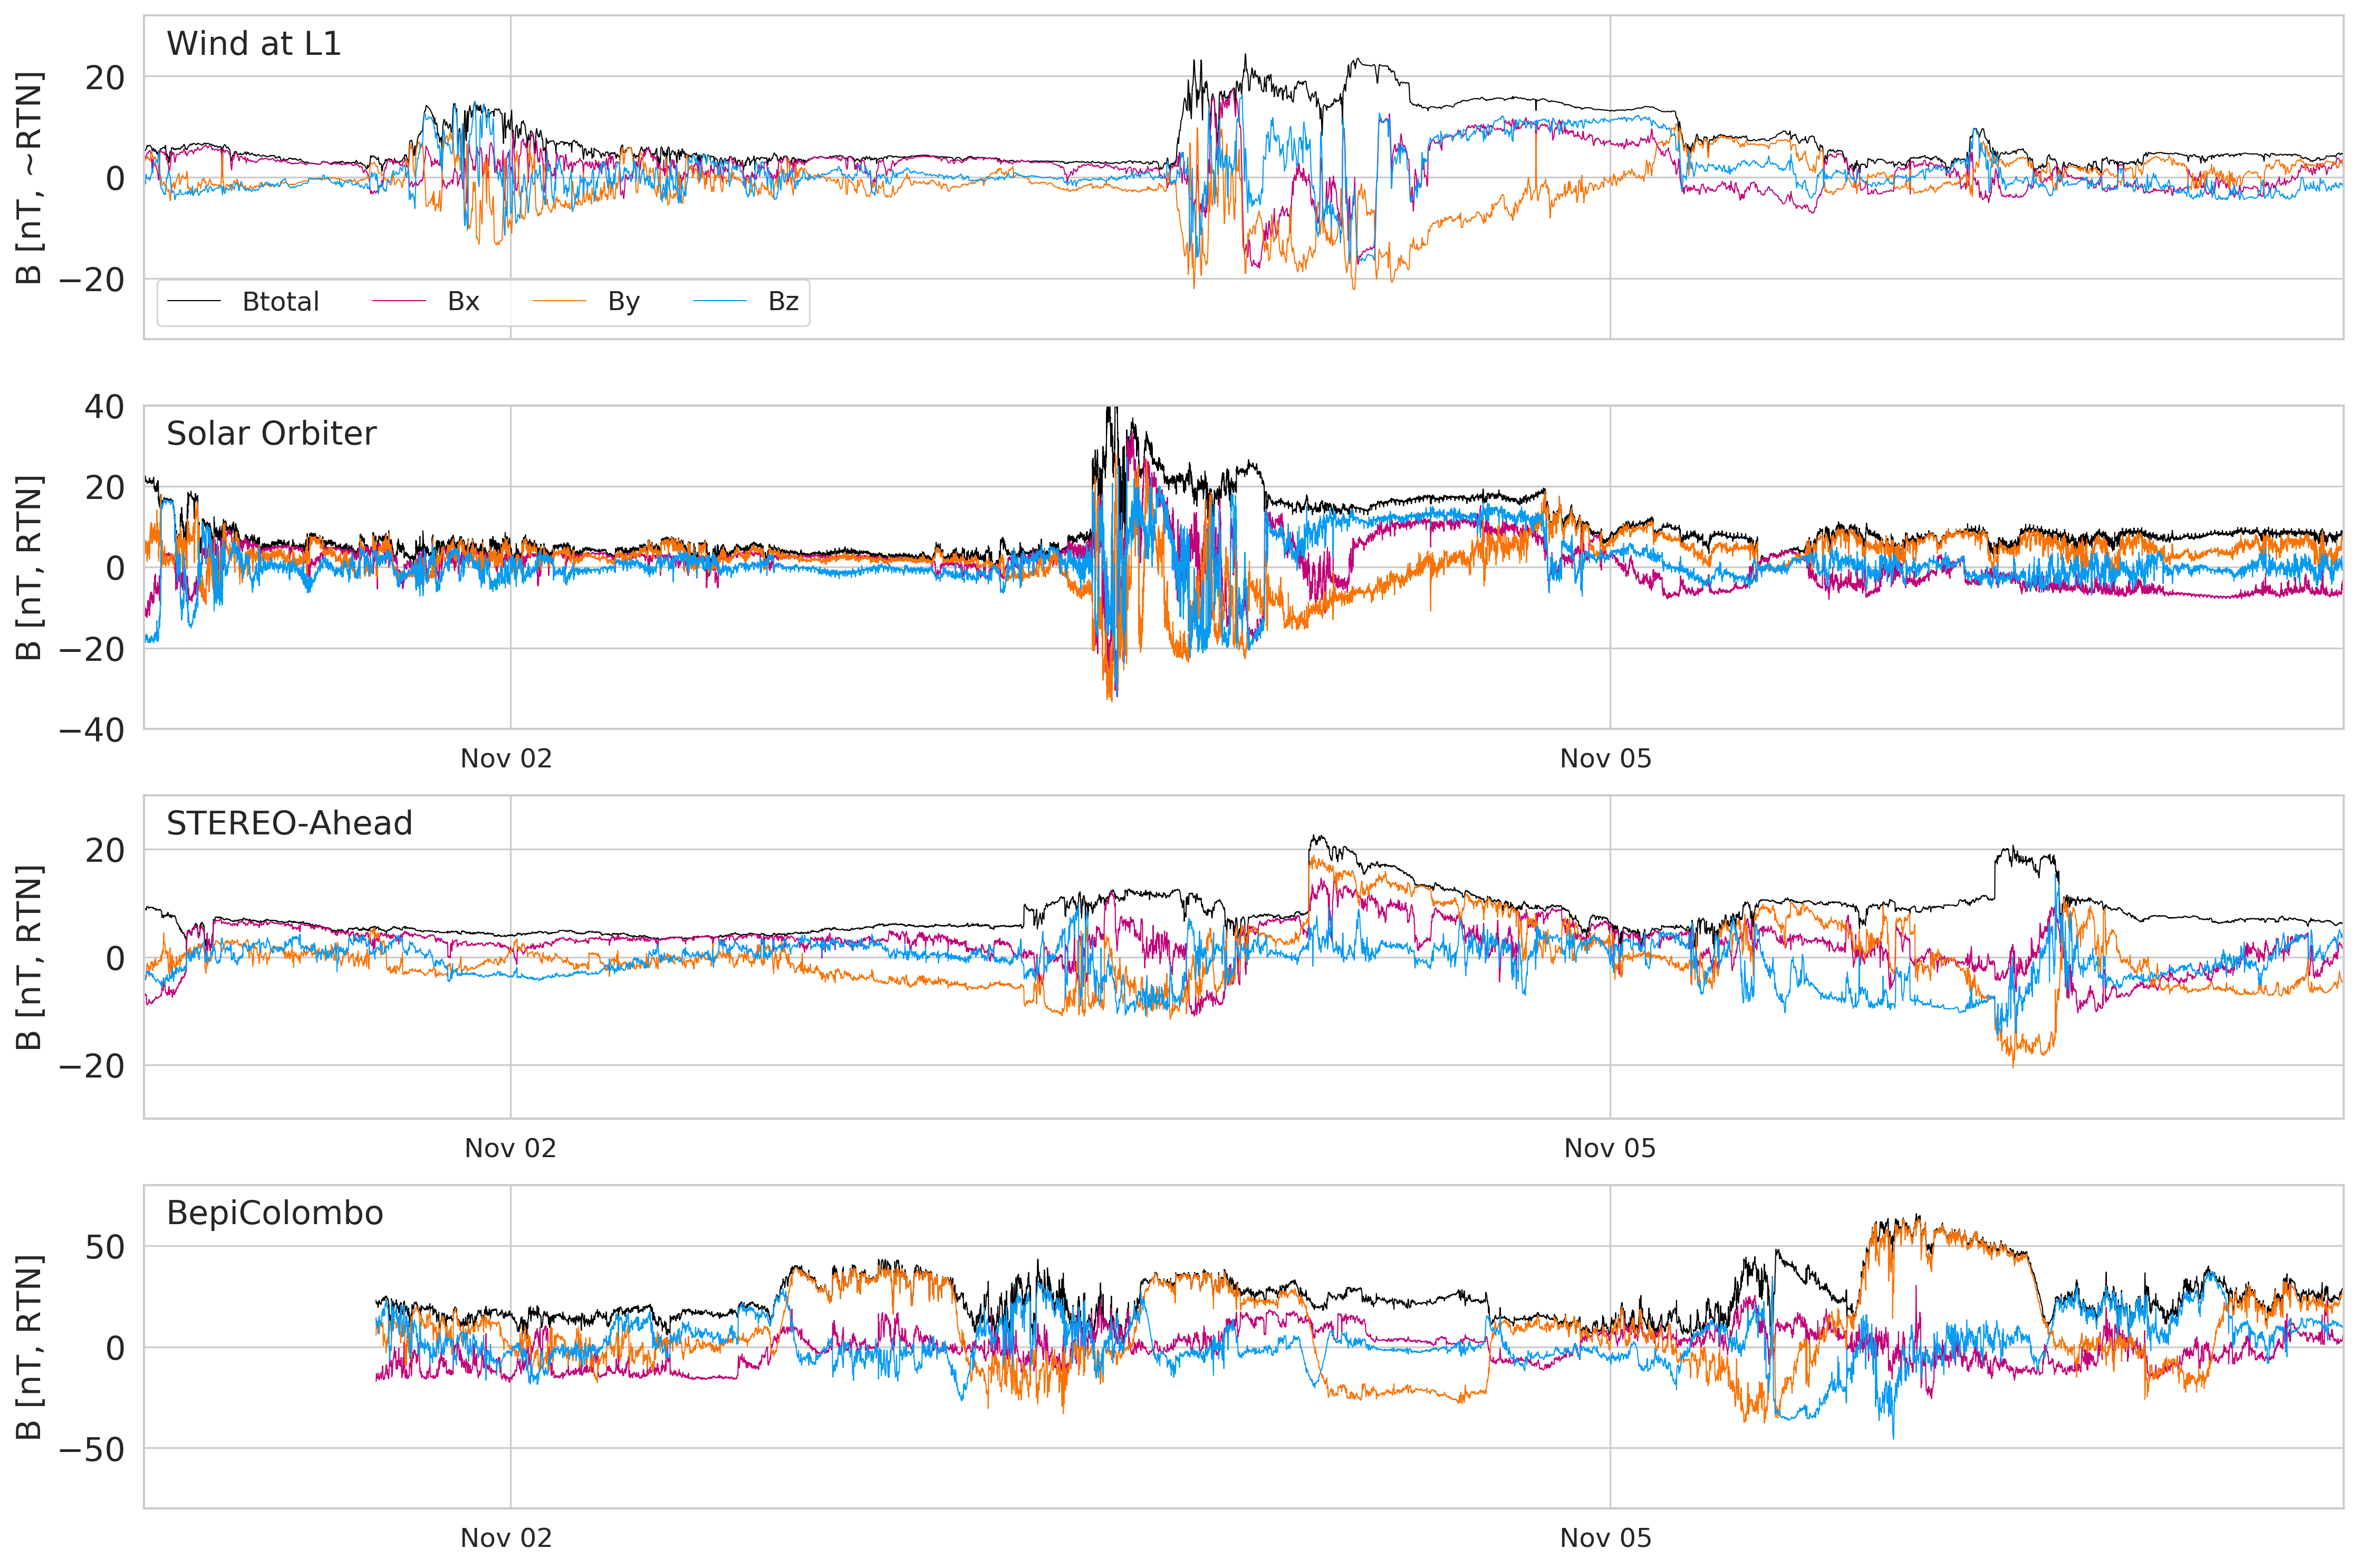

In [15]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(1,figsize=(15, 10),dpi=300)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (0, 0))  
#ax11 = plt.subplot2grid((7, 1), (1, 0))  
#ax12 = plt.subplot2grid((7, 1), (2, 0))  
#ax13 = plt.subplot2grid((7, 1), (3, 0))  
ax2 = plt.subplot2grid((4, 1), (2, 0))  
ax3 = plt.subplot2grid((4, 1), (1, 0))  
ax4 = plt.subplot2grid((4, 1), (3, 0))  



#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)

plotstart=datetime.datetime(2021,11,1)
plotend=datetime.datetime(2021,11,7)



blim=32

linewi=0.5

days_dist=3


#Wind
ax1.plot(win.time, win.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
ax1.plot(win.time, win.by, "g-", color="xkcd:orange", lw=linewi,label='By')
ax1.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')

ax1.set_ylabel('B [nT, ~RTN]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)
ax1.set_xticklabels([])


#ax11.plot(noaa.time, noaa.vt, color="black",linewidth=1,label='Vp Wind')
#ax11.set_ylabel('V [km $\mathrm{s^{-1}}$]')
#ax11.set_xlim(plotstart,plotend)
#ax11.set_ylim(100,550)
#ax11.grid(True)
#ax11.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
#ax11.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))

#ax11.set_xticklabels([])



### STEREO-A
blim=30

ax2.plot(sta.time, sta.bt, "k-", lw=linewi,label='Btotal')
ax2.plot(sta.time, sta.bx, "r-", color="xkcd:magenta", lw=linewi, label='Br')
ax2.plot(sta.time, sta.by, "g-", color="xkcd:orange", lw=linewi,label='Bt')
ax2.plot(sta.time, sta.bz, "b-", color="xkcd:azure", lw=linewi,label='Bn')
    
ax2.set_ylabel('B [nT, RTN]',fontsize=15)
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d') )
ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


### Solar Orbiter
blim=40
ax3.plot(solo.time, solo.bt, "k-", lw=linewi,label='Btotal')
ax3.plot(solo.time, solo.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
ax3.plot(solo.time, solo.by, "g-", color="xkcd:orange", lw=linewi,label='By')
ax3.plot(solo.time, solo.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')
    
ax3.set_ylabel('B [nT, RTN]',fontsize=15)
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(-blim,blim)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax3.grid(True)
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


### Bepi
blim=80

ax4.plot(bepi.time, bepi.bt, "k-", lw=linewi,label='Btotal')
ax4.plot(bepi.time, bepi.bx, "r-", color="xkcd:magenta", lw=linewi, label='Br')
ax4.plot(bepi.time, bepi.by, "g-", color="xkcd:orange", lw=linewi,label='Bt')
ax4.plot(bepi.time, bepi.bz, "b-", color="xkcd:azure", lw=linewi,label='Bn')


    
ax4.set_ylabel('B [nT, RTN]',fontsize=15)
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(-blim,blim)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=15)
ax4.grid(True)
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


ax1.annotate('Wind at L1',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('STEREO-Ahead',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax3.annotate('Solar Orbiter',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax4.annotate('BepiColombo',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))

#ax2.annotate('Data sources: Solar Orbiter MAG (Imperial College), DSCOVR (NOAA), STEREO-A (UCLA, NASA)',(0.01,0.02),xycoords='axes fraction',fontsize=10)
#ax4.annotate('Data source: BepiColombo MPO-MAG (IGEP Braunschweig/IWF Graz/ISAS/IC)',(0.01,0.02),xycoords='axes fraction',fontsize=10)


plt.tight_layout()


plt.savefig('lineups/figure_2021_nov2.png')
plt.savefig('lineups/figure_2021_nov2.pdf')
#plt.savefig('lineups/fall_2021/figure_2021_fall_lineups_beg_oct1.pdf')
#plt.savefig('lineups/figure_2020_sep_lineups.pdf')

#ax2.plot(bepi.time, bepi.bt, "k-", lw=1,label='Btotal')
#ax2.plot(bepi.time, bepi.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
#ax2.plot(bepi.time, bepi.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax2.plot(bepi.time, bepi.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

#ax3.plot(win.time, win.bt, "k-", lw=1,label='Btotal')
#ax3.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
#ax3.plot(win.time, win.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax3.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

## Plot Oct 9 2021 CME



HEEQ position of SolO r/lat/lon at icme_start_time: 0.691 2.36 -12.98


HEEQ position of Bepi r/lat/lon at icme_start_time: 0.328 2.29 5.89


HEEQ position of STEREO-A r/lat/lon at icme_start_time: 0.959 -1.21 -46.02


HEEQ position of Wind r/lat/lon at icme_start_time: 0.974 -5.58 -0.08


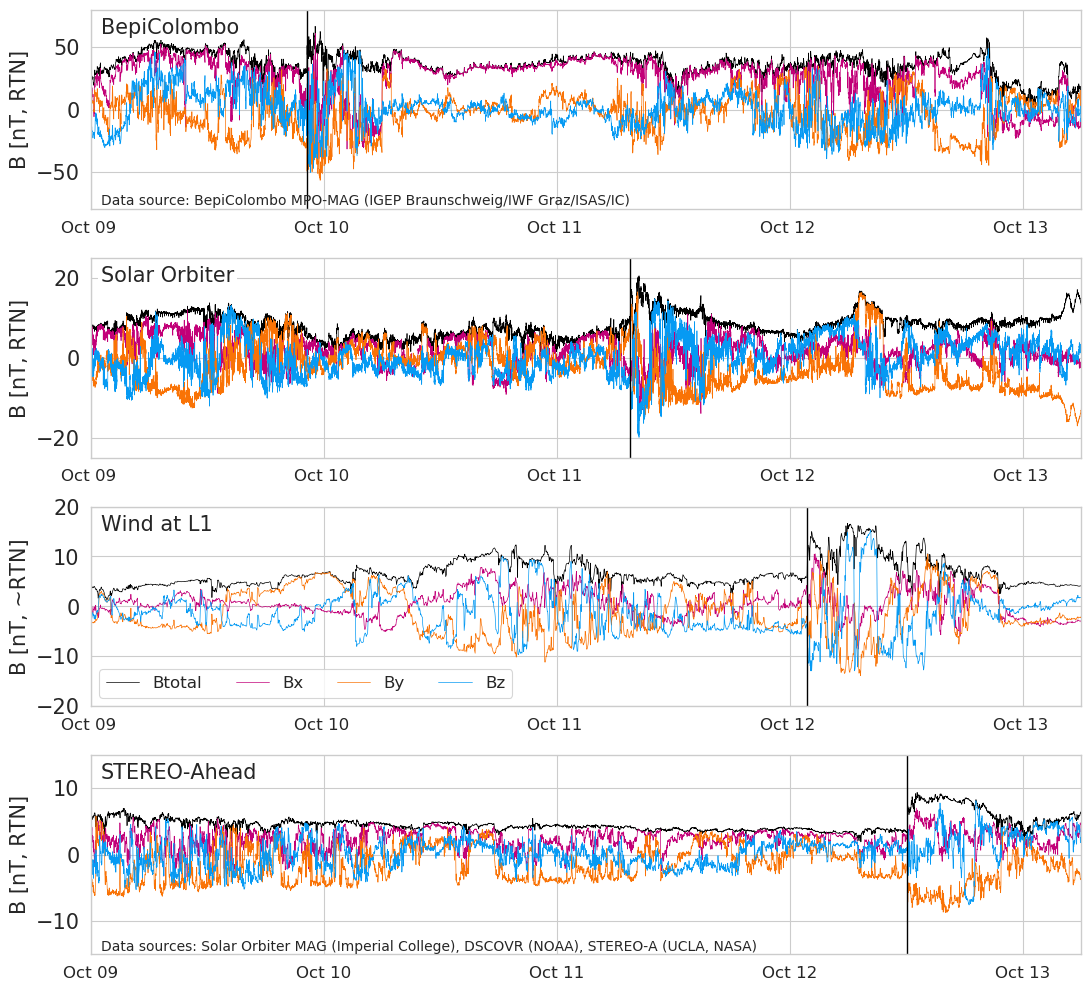

In [26]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(1,figsize=(11, 10),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (2, 0))  
ax2 = plt.subplot2grid((4, 1), (3, 0))  
ax3 = plt.subplot2grid((4, 1), (1, 0))  
ax4 = plt.subplot2grid((4, 1), (0, 0))  



plotstart=datetime.datetime(2021,10,9)
plotend=datetime.datetime(2021,10,13,6)



#shock arrivals = icme start time
#bepi  2021-10-09T22:15Z
#solo  2021-10-11T07:33Z 
#wind: 2021-10-12T01:46Z
#sta:  2021-10-12T12:06Z



print()
sicme_start_time=parse_time('2021-10-11T07:33Z').datetime
sicme_start_ind=np.where(solo.time>sicme_start_time)[0][0]
print()
print('HEEQ position of SolO r/lat/lon at icme_start_time:',np.round(solo.r[sicme_start_ind],3),np.round(solo.lat[sicme_start_ind],2),np.round(solo.lon[sicme_start_ind],2))


print()
bicme_start_time=parse_time('2021-10-09T22:15Z').datetime
bicme_start_ind=np.where(bepi.time>bicme_start_time)[0][0]
print()
print('HEEQ position of Bepi r/lat/lon at icme_start_time:',np.round(bepi.r[bicme_start_ind],3),np.round(bepi.lat[bicme_start_ind],2),np.round(bepi.lon[bicme_start_ind],2))



print()
staicme_start_time=parse_time('2021-10-12T12:06Z').datetime
staicme_start_ind=np.where(sta.time>staicme_start_time)[0][0]
print()
print('HEEQ position of STEREO-A r/lat/lon at icme_start_time:',np.round(sta.r[sicme_start_ind],3),np.round(sta.lat[sicme_start_ind],2),np.round(sta.lon[sicme_start_ind],2))


print()
wicme_start_time=parse_time('2021-10-12T01:46Z').datetime
wicme_start_ind=np.where(solo.time>wicme_start_time)[0][0]
print()
print('HEEQ position of Wind r/lat/lon at icme_start_time:',np.round(win.r[sicme_start_ind],3),np.round(win.lat[sicme_start_ind],2),np.round(win.lon[sicme_start_ind],2))












linewi=0.5

days_dist=1


#Wind

blim=20
ax1.plot(win.time, win.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
ax1.plot(win.time, win.by, "g-", color="xkcd:orange", lw=linewi,label='By')
ax1.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')

ax1.set_ylabel('B [nT, ~RTN]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)


ax1.plot_date([wicme_start_time,wicme_start_time],[-500,500],'-k',linewidth=1)    

### STEREO-A
blim=15

ax2.plot(sta.time, sta.bt, "k-", lw=linewi,label='Btotal')
ax2.plot(sta.time, sta.bx, "r-", color="xkcd:magenta", lw=linewi, label='Br')
ax2.plot(sta.time, sta.by, "g-", color="xkcd:orange", lw=linewi,label='Bt')
ax2.plot(sta.time, sta.bz, "b-", color="xkcd:azure", lw=linewi,label='Bn')
    
ax2.set_ylabel('B [nT, RTN]',fontsize=15)
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d') )
ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


ax2.plot_date([staicme_start_time,staicme_start_time],[-500,500],'-k',linewidth=1)    

### Solar Orbiter
blim=25
ax3.plot(solo.time, solo.bt, "k-", lw=linewi,label='Btotal')
ax3.plot(solo.time, solo.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
ax3.plot(solo.time, solo.by, "g-", color="xkcd:orange", lw=linewi,label='By')
ax3.plot(solo.time, solo.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')
    
ax3.set_ylabel('B [nT, RTN]',fontsize=15)
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(-blim,blim)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax3.grid(True)
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


ax3.plot_date([sicme_start_time,sicme_start_time],[-500,500],'-k',linewidth=1)    

### Bepi
blim=80

ax4.plot(bepi.time, bepi.bt, "k-", lw=linewi,label='Btotal')
ax4.plot(bepi.time, bepi.bx, "r-", color="xkcd:magenta", lw=linewi, label='Br')
ax4.plot(bepi.time, bepi.by, "g-", color="xkcd:orange", lw=linewi,label='Bt')
ax4.plot(bepi.time, bepi.bz, "b-", color="xkcd:azure", lw=linewi,label='Bn')


ax4.plot_date([bicme_start_time,bicme_start_time],[-500,500],'-k',linewidth=1)    

    
ax4.set_ylabel('B [nT, RTN]',fontsize=15)
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(-blim,blim)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=15)
ax4.grid(True)
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))


ax1.annotate('Wind at L1',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('STEREO-Ahead',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax3.annotate('Solar Orbiter',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax4.annotate('BepiColombo',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))

ax2.annotate('Data sources: Solar Orbiter MAG (Imperial College), DSCOVR (NOAA), STEREO-A (UCLA, NASA)',(0.01,0.02),xycoords='axes fraction',fontsize=10)
ax4.annotate('Data source: BepiColombo MPO-MAG (IGEP Braunschweig/IWF Graz/ISAS/IC)',(0.01,0.02),xycoords='axes fraction',fontsize=10)



plt.tight_layout()


plt.savefig('lineups/figure_2021_oct9.png')
plt.savefig('lineups/figure_2021_oct9.pdf')
#plt.savefig('lineups/fall_2021/figure_2021_fall_lineups_beg_oct1.pdf')
#plt.savefig('lineups/figure_2020_sep_lineups.pdf')

#ax2.plot(bepi.time, bepi.bt, "k-", lw=1,label='Btotal')
#ax2.plot(bepi.time, bepi.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
#ax2.plot(bepi.time, bepi.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax2.plot(bepi.time, bepi.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

#ax3.plot(win.time, win.bt, "k-", lw=1,label='Btotal')
#ax3.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
#ax3.plot(win.time, win.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax3.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

In [5]:
#CACTUS
url_cactus='https://wwwbis.sidc.be/cactus/catalog/LASCO/2_5_0/cmecat_combo.sav'

try: urllib.request.urlretrieve(url_cactus,'data/LASCO_CME/cmecat_combo.sav')
except urllib.error.URLError as e:
    print('lasco cme not loaded')


#LASCO CME catalog 
url_lasco='https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/text_ver/univ_all.txt'

try: urllib.request.urlretrieve(url_lasco,'data/LASCO_CME/univ_all.txt')
except urllib.error.URLError as e:
    print('lasco cme not loaded')

In [6]:
#read lasco catalog

la=np.genfromtxt('data/LASCO_CME/univ_all.txt',dtype=(str), usecols=[0,1,2,3,4,5,6,7,8,9,10,11],skip_header=4)

la_time=[]
cpa=np.zeros(len(la))
width=np.zeros(len(la))
speedlin=np.zeros(len(la))

# ========= SOHO/LASCO CME CATALOG==========      LAST UPDATED: 2021/08/09 13:39
# Date       Time     Central  Width  Linear   2nd order speed      Accel     Mass      Kinetic    MPA   Remarks
#                        PA           Speed  initial final   20R                        Energy                 

for i in np.arange(0,len(la)):
    #convert time from string to datetime
    la_time.append(parse_time(la[i][0]+' '+la[i][1]).isot)
    
    
    if la[i][2]=='Halo': 
        cpa[i]=360
    else:
        cpa[i]=float(la[i][2])

    width[i]=int(la[i][3])
    
    if la[i][4]=='----':
        speedlin[i]=np.nan
    else:
        speedlin[i]=int(la[i][4])

#print(la_time)
#print(cpa)
#print(width)
#print(speedlin)

data=np.vstack([parse_time(la_time).datetime,cpa,width,speedlin])
# Create the pandas DataFrame
ldf = pd.DataFrame(data.transpose(), columns = ['time','cpa','width','speed'])
                                   

### load WSA/THUX solar wind speed data

In [7]:
wsa_all=np.loadtxt('data/thux/wsa-planets-missions-cr2047-cr2246.txt',skiprows=1)

#file looks like
#Time[matlab]	vEarth	vMercury	vVenus	vMars	vBepi	vPSP	vSOLO	vSTEREOA	vSTEREOB			

#need to convert matlab time to matplotlib time
wsa_all_datetime=[None]*len(wsa_all)
for p in np.arange(len(wsa_all)):
        wsa_all_datetime[p]= datetime.datetime.fromordinal(wsa_all[p,0].astype(int) ) + \
        datetime.timedelta(days=wsa_all[p,0]%1) - datetime.timedelta(days = 366) 


#make recarray
thux=np.zeros(np.size(wsa_all_datetime),dtype=[('time',object),('wind', float),('bepi', float),\
            ('psp', float),('solo', float),('sta', float)] )   

#convert to recarray
thux = thux.view(np.recarray)  
thux.time=wsa_all_datetime
thux.wind=wsa_all[:,1]
thux.bepi=wsa_all[:,5]
thux.psp=wsa_all[:,6]
thux.solo=wsa_all[:,7]
thux.sta=wsa_all[:,8]                                       

print('done')

done
